# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

2021-07-24 22:43:13.647682: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


### Initialising the RNN

In [10]:
regressor = Sequential()

2021-07-24 22:52:09.331621: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-24 22:52:15.082498: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-24 22:52:15.082636: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Pavilion17): /proc/driver/nvidia/version does not exist
2021-07-24 22:52:15.083690: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Adding the first LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [15]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [17]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

2021-07-24 23:06:14.271680: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-24 23:06:14.347579: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2394425000 Hz


Epoch 1/100
38/38 [==============================] - 51s 231ms/step - loss: 0.1158
Epoch 2/100
38/38 [==============================] - 8s 216ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 7s 171ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 7s 183ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0056
Epoch 8/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 7s 174ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 7s 171ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0045
Epoch 13/100

38/38 [==============================] - 7s 175ms/step - loss: 0.0013
Epoch 100/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0018


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

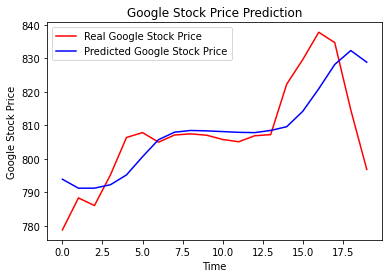

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()